# CDS503 Machine Learning
## Project
## Music Genre Classification for Spotify Tracks

### Members:
1. Chin Yi Xiang P-COM0109/19
2. Lau Ling Thiam P-COM0133/19
3. Teoh Jia Jun P-COM0069/19

## Part 1: Exploratory Data Analysis and Visualization

In [1]:
# read data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

input_path = 'ultimate-spotify-tracks-db/SpotifyFeatures.csv'
raw_df = pd.read_csv(input_path, delimiter=',')
raw_df.sample(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
15430,Dance,Lana Del Rey,Coachella - Woodstock In My Mind,5UPHeuDP0AnG830Yf3bJJD,62,0.18900,0.535,258398,0.658,0.000041,G,0.0683,-7.425,Major,0.0998,129.835,4/4,0.413
222860,Rock,Spandau Ballet,True,0CsM8VGDi38kusMv3pxyj1,73,0.50600,0.744,328293,0.545,0.097700,C,0.0649,-9.361,Major,0.0297,97.409,4/4,0.346
136453,Reggae,Vybz Kartel,Pretty Position,1wZyHwstSV771TRF5OQ0ZS,30,0.14600,0.612,155011,0.787,0.000000,C#,0.0669,-3.175,Minor,0.3080,101.783,4/4,0.605
115795,Rap,System Of A Down,Lonely Day,1VNWaY3uNfoeWqb5U8x2QX,72,0.36200,0.470,167907,0.796,0.000001,G#,0.1330,-3.277,Minor,0.0336,113.108,3/4,0.215
19116,Dance,Selena Gomez,Magic,10xcIQQEJSEIOgG1HvS3t9,51,0.00577,0.614,169250,0.919,0.000000,B,0.3340,-3.011,Minor,0.0413,104.063,4/4,0.514


<BarContainer object of 27 artists>

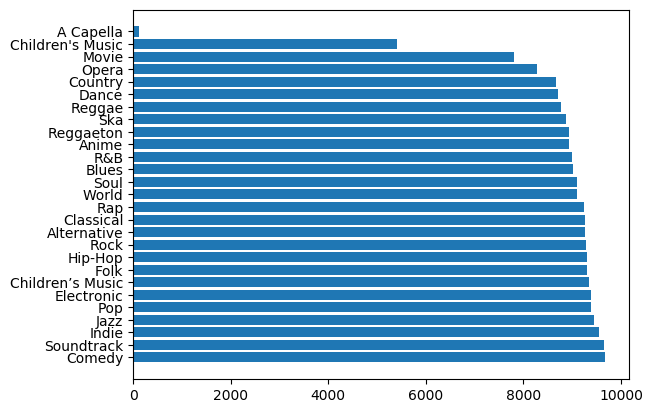

In [2]:
# genre is our class labels
genre_counts = raw_df['genre'].value_counts()
plt.rcdefaults()
fig, ax = plt.subplots()
plt.barh(genre_counts.index,genre_counts,align='center')

- A Capella has extremely small sample size
- Childern's Music has two labels

<BarContainer object of 26 artists>

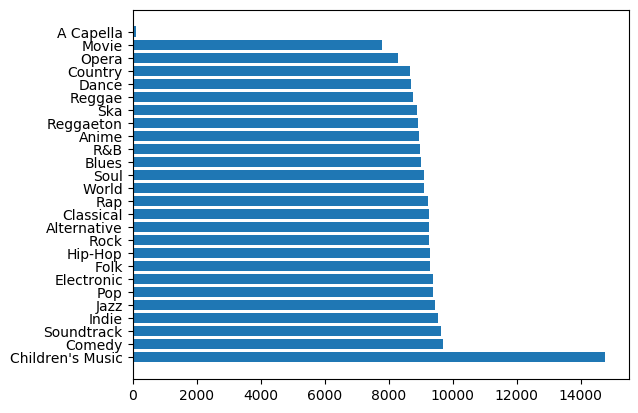

In [3]:
# Children's Music duplicated
raw_df["genre"] = raw_df["genre"].replace("Children’s Music", "Children's Music")
genre_counts = raw_df['genre'].value_counts()
plt.rcdefaults()
fig, ax = plt.subplots()
plt.barh(genre_counts.index,genre_counts,align='center')

In [4]:
# check NA
raw_df.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [5]:
#Check for duplicated track_id
df1 = raw_df[raw_df.duplicated(subset='track_id',keep='first')==False]
print('Raw: {}'.format(raw_df.shape))
print('df1: {}'.format(df1.shape))

Raw: (232725, 18)
df1: (176774, 18)


In [6]:
y=df1['genre']
X=df1.iloc[:,4:]
X.sample(5)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
186084,24,0.01540,0.554,174333,0.569,0.00001,A,0.457,-6.860,Major,0.0349,169.606,4/4,0.734
172819,18,0.62600,0.488,458813,0.755,0.00000,C,0.714,-9.687,Major,0.9430,84.871,4/4,0.155
187827,48,0.00951,0.537,326053,0.592,0.01320,D#,0.385,-6.516,Minor,0.0307,85.328,4/4,0.184
68389,63,0.18500,0.790,226000,0.585,0.00000,G#,0.292,-6.058,Major,0.0348,94.072,4/4,0.585
167717,39,0.84200,0.579,342293,0.954,0.00000,F,0.586,-5.286,Minor,0.9240,79.541,4/4,0.256


In [7]:
X.describe(include='all')

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,176774.000000,176774.000000,176774.000000,1.767740e+05,176774.000000,176774.000000,176774,176774.000000,176774.000000,176774,176774.000000,176774.000000,176774,176774.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,2,NaN,NaN,5,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,Major,NaN,NaN,4/4,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,20970,NaN,NaN,116619,NaN,NaN,149187,NaN
mean,36.273162,0.404135,0.541068,2.361272e+05,0.557025,0.172073,NaN,0.224531,-10.137605,NaN,0.127395,117.203679,NaN,0.451595
std,17.391016,0.366302,0.190387,1.305132e+05,0.275839,0.322936,NaN,0.211027,6.395551,NaN,0.204345,31.325091,NaN,0.267820
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,NaN,0.009670,-52.457000,NaN,0.022200,30.379000,NaN,0.000000
25%,25.000000,0.045600,0.415000,1.782530e+05,0.344000,0.000000,NaN,0.097500,-12.851000,NaN,0.036800,92.006000,NaN,0.222000
50%,37.000000,0.288000,0.558000,2.194530e+05,0.592000,0.000070,NaN,0.130000,-8.191000,NaN,0.049400,115.006500,NaN,0.440000
75%,49.000000,0.791000,0.683000,2.685470e+05,0.789000,0.090800,NaN,0.277000,-5.631000,NaN,0.102000,138.799750,NaN,0.667000


# Encode Categorical Data

In [8]:
# remove unwanted feature
# the original API from Spotify API Doc are integer values, does not sure how author transformed to current categorical values 
# https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/
X = X.drop('time_signature',axis = 1)

# label encoding
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder
le = LabelEncoder()
labels = le.fit_transform(y)

# encoding and scaling
numerical_variables  = X.select_dtypes(include=[np.number]).columns # numerical 

# one hot encode
X['key'] = pd.Categorical(X['key'])
X_key_OneHot = pd.get_dummies(X['key'], prefix = 'key')
X['mode'] = pd.Categorical(X['mode'])
X_mode_OneHot = pd.get_dummies(X['mode'], prefix = 'mode')

# convert back to pd data frame
features = pd.concat([X[numerical_variables], X_key_OneHot, X_mode_OneHot], axis=1)
features.head(5)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,0,0.611,0.389,99373,0.910,0.000,0.3460,-1.828,0.0525,166.969,...,1,0,0,0,0,0,0,0,1,0
1,1,0.246,0.590,137373,0.737,0.000,0.1510,-5.559,0.0868,174.003,...,0,0,0,0,0,1,0,0,0,1
2,3,0.952,0.663,170267,0.131,0.000,0.1030,-13.879,0.0362,99.488,...,0,0,0,0,0,0,0,0,0,1
3,0,0.703,0.240,152427,0.326,0.000,0.0985,-12.178,0.0395,171.758,...,1,0,0,0,0,0,0,0,1,0
4,4,0.950,0.331,82625,0.225,0.123,0.2020,-21.150,0.0456,140.576,...,0,0,0,0,1,0,0,0,1,0


In [9]:
features.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
count,176774.000000,176774.000000,176774.000000,1.767740e+05,176774.000000,176774.000000,176774.000000,176774.000000,176774.000000,176774.000000,...,176774.000000,176774.000000,176774.000000,176774.000000,176774.000000,176774.000000,176774.000000,176774.000000,176774.000000,176774.000000
mean,36.273162,0.404135,0.541068,2.361272e+05,0.557025,0.172073,0.224531,-10.137605,0.127395,117.203679,...,0.095353,0.105462,0.033715,0.075848,0.088277,0.064291,0.115832,0.063216,0.659707,0.340293
std,17.391016,0.366302,0.190387,1.305132e+05,0.275839,0.322936,0.211027,6.395551,0.204345,31.325091,...,0.293703,0.307149,0.180496,0.264756,0.283697,0.245272,0.320024,0.243352,0.473809,0.473809
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.045600,0.415000,1.782530e+05,0.344000,0.000000,0.097500,-12.851000,0.036800,92.006000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.288000,0.558000,2.194530e+05,0.592000,0.000070,0.130000,-8.191000,0.049400,115.006500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,49.000000,0.791000,0.683000,2.685470e+05,0.789000,0.090800,0.277000,-5.631000,0.102000,138.799750,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feature Selection

In [10]:
from sklearn.feature_selection import SelectKBest
kb = SelectKBest(k=5) # ANOVA
kb.fit(features, labels)
selected = kb.get_support(True)
print(features.columns[selected])

input_features = features.iloc[:,selected]
input_features.sample(5)

Index(['popularity', 'acousticness', 'danceability', 'loudness',
       'speechiness'],
      dtype='object')


,popularity,acousticness,danceability,loudness,speechiness
83531,45,0.2300,0.603,-4.252,0.0504
197923,48,0.9330,0.219,-29.830,0.0357
7344,37,0.0522,0.510,-5.489,0.0271
160936,50,0.2360,0.689,-5.650,0.0369
65146,52,0.5540,0.813,-11.543,0.0921


In [26]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

pred_model = GaussianNB()
sfs = SFS(pred_model, k_features=5, forward=True, scoring='accuracy', cv=0)
sfs = sfs.fit(features, labels)
sfs.subsets_

{1: {'feature_idx': (0,),
  'cv_scores': array([0.16465091]),
  'avg_score': 0.1646509102017265,
  'feature_names': ('popularity',)},
 2: {'feature_idx': (0, 2),
  'cv_scores': array([0.25930284]),
  'avg_score': 0.25930283865274306,
  'feature_names': ('popularity', 'danceability')},
 3: {'feature_idx': (0, 1, 2),
  'cv_scores': array([0.31601367]),
  'avg_score': 0.31601366716824875,
  'feature_names': ('popularity', 'acousticness', 'danceability')},
 4: {'feature_idx': (0, 1, 2, 8),
  'cv_scores': array([0.34013486]),
  'avg_score': 0.34013486146152716,
  'feature_names': ('popularity',
   'acousticness',
   'danceability',
   'speechiness')},
 5: {'feature_idx': (0, 1, 2, 8, 10),
  'cv_scores': array([0.35973616]),
  'avg_score': 0.359736160295066,
  'feature_names': ('popularity',
   'acousticness',
   'danceability',
   'speechiness',
   'valence')}}

## Data Splitting

In [11]:
from sklearn.model_selection import train_test_split
# training 80%, test 20%
X_train,X_test,y_train,y_test = train_test_split(input_features, labels,test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(141419, 5)
(141419,)
(35355, 5)
(35355,)


## Normalization

In [12]:
# normalization
# https://stackoverflow.com/questions/49444262/normalize-data-before-or-after-split-of-training-and-testing-data/49444783
# https://datascience.stackexchange.com/questions/31652/should-one-hot-vectors-be-scaled-with-numerical-attributes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalizer = scaler.fit(X_train)

X_train = normalizer.transform(X_train)
X_test = normalizer.transform(X_test)

## KNN (Non-Parametric)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# baseline knn
knn_base = KNeighborsClassifier()
%time knn_base.fit(X_train,y_train)

Wall time: 117 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [14]:
knn_base_pred = knn_base.predict(X_test)
knn_base_report = classification_report(y_pred = knn_base_pred, y_true = y_test)
print(knn_base_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.21      0.40      0.27      1822
           2       0.31      0.42      0.35      1751
           3       0.19      0.25      0.21      1740
           4       0.53      0.55      0.54      1381
           5       0.45      0.53      0.49      1737
           6       0.95      0.94      0.94      1924
           7       0.19      0.24      0.21      1435
           8       0.24      0.33      0.28      1549
           9       0.28      0.26      0.27      1829
          10       0.26      0.29      0.27      1589
          11       0.46      0.51      0.48      1545
          12       0.09      0.04      0.05       662
          13       0.20      0.15      0.17      1621
          14       0.45      0.34      0.39      1552
          15       0.70      0.74      0.72      1642
          16       0.21      0.12      0.16       498
          17       0.15    

In [15]:
# Hyperparameters Tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
k_values = list(range(1,60,2))
params = {'n_neighbors':k_values,'weights':['uniform','distance']}
gsc = GridSearchCV(knn,param_grid=params,cv=5,refit=True,n_jobs=-1)
%time gsc.fit(X_train, y_train)

Wall time: 2min 14s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 31, 33, 35, 37, 39, 41,
                                         43, 45, 47, 49, 51, 53, 55, 57, 59],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

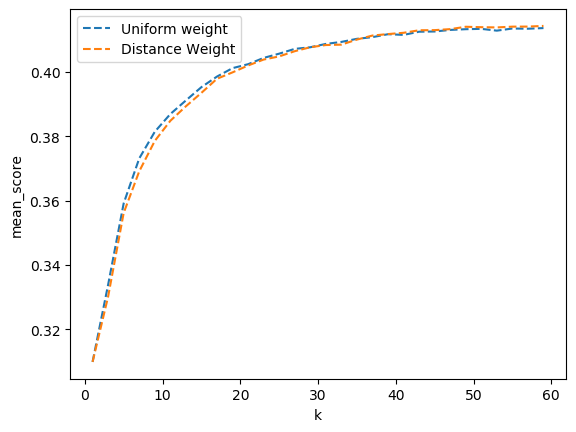

In [16]:
knn_cv_df = pd.DataFrame(columns=['weight','k','mean_score','std_score'])
for i, param in enumerate(gsc.cv_results_['params'],start=0):
    param_df = pd.DataFrame([[param['weights'], param['n_neighbors'],gsc.cv_results_['mean_test_score'][i],gsc.cv_results_['std_test_score'][i]]],columns=['weight','k','mean_score','std_score'])
    knn_cv_df = knn_cv_df.append(param_df,ignore_index=True)
plt.rcdefaults()
fig, ax = plt.subplots()
plot_1 = knn_cv_df[knn_cv_df['weight']=='uniform']
plot_2 = knn_cv_df[knn_cv_df['weight']=='distance']
plt.plot(plot_1['k'],plot_1['mean_score'],label='Uniform weight',ls='dashed')
plt.plot(plot_2['k'],plot_2['mean_score'],label='Distance Weight',ls='dashed')
plt.xlabel('k')
plt.ylabel('mean_score')
plt.legend(loc='upper left')
plt.show()

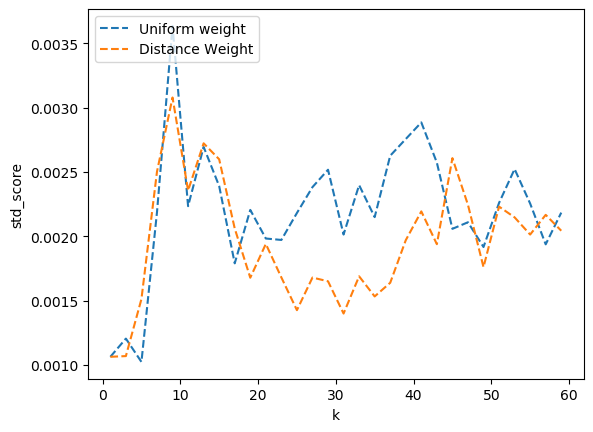

In [17]:
plt.rcdefaults()
fig, ax = plt.subplots()
plt.plot(plot_1['k'],plot_1['std_score'],label='Uniform weight',ls='dashed')
plt.plot(plot_2['k'],plot_2['std_score'],label='Distance Weight',ls='dashed')
plt.legend(loc='upper left')
plt.xlabel('k')
plt.ylabel('std_score')
plt.show()

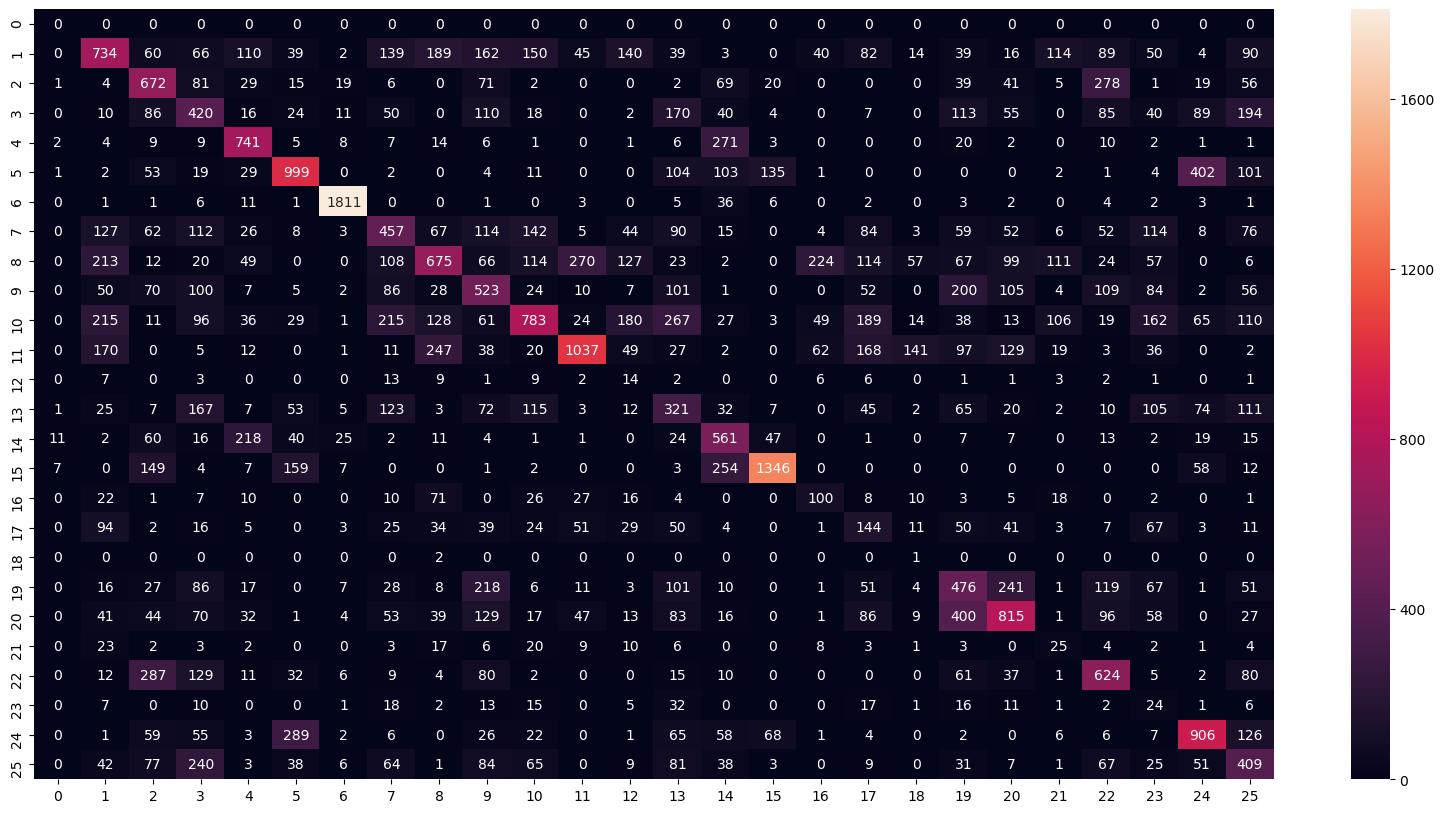

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.30      0.40      0.35      1822
           2       0.47      0.38      0.42      1751
           3       0.27      0.24      0.26      1740
           4       0.66      0.54      0.59      1381
           5       0.51      0.58      0.54      1737
           6       0.95      0.94      0.95      1924
           7       0.26      0.32      0.29      1435
           8       0.28      0.44      0.34      1549
           9       0.32      0.29      0.30      1829
          10       0.28      0.49      0.35      1589
          11       0.46      0.67      0.54      1545
          12       0.17      0.02      0.04       662
          13       0.23      0.20      0.21      1621
          14       0.52      0.36      0.43      1552
          15       0.67      0.82      0.74      1642
          16       0.29      0.20      0.24       498
          17       0.20    

C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [18]:
#predict test data
import seaborn as sns
tuned_knn = gsc.best_estimator_
knn_y_pred = tuned_knn.predict(X_test)
cm = pd.DataFrame(confusion_matrix(knn_y_pred,y_test))

plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True, fmt='g')

#plt.rcdefaults()
#fig, ax = plt.subplots()
#sns.heatmap(cm)
plt.show()

print(classification_report(y_pred = knn_y_pred, y_true = y_test))

## Naives Bayes (Parametric)

Wall time: 43 ms
Number of mislabeled points out of a total 35355 points : 22979, performance 35.00%


Text(0.5, 80.7222222222222, 'Predicted label')

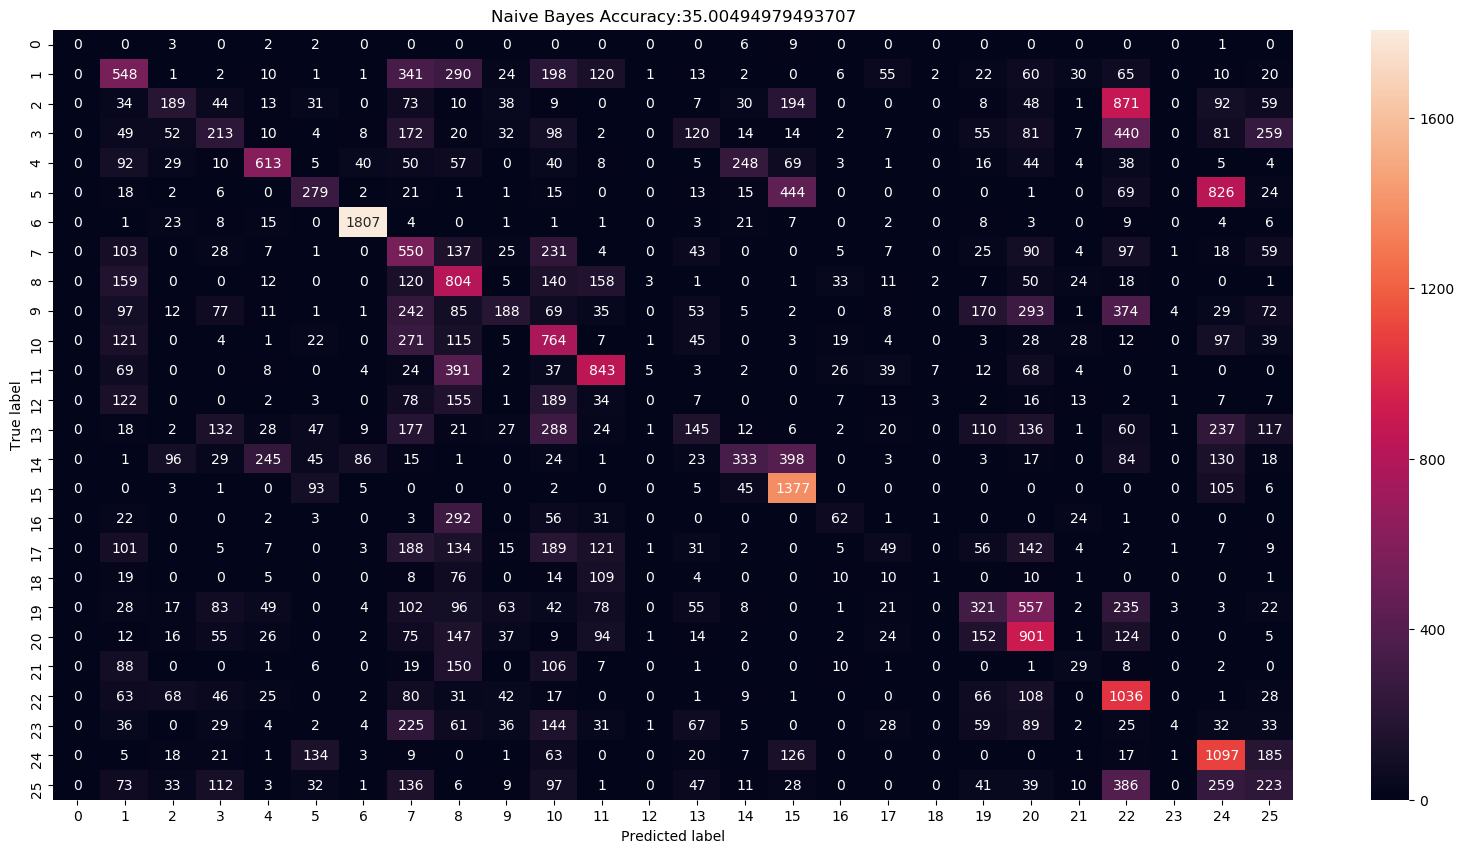

In [19]:
from sklearn.naive_bayes import GaussianNB

# Instantiate the classifier
gnb = GaussianNB()

# Train classifier
%time gnb.fit(X_train,y_train)

# Test the classifier
predict = gnb.predict(X_test)

# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
        .format(X_test.shape[0], (y_test != predict).sum(),
            gnb.score(X_test,y_test)*100 ))

# Creates a confusion matrix
cm = confusion_matrix(y_test, predict)

# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm)

# plot the confusion matrix
plt.figure(figsize=(20,10))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title("Naive Bayes Accuracy:" + str(gnb.score(X_test,y_test)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')

## Neural Network

In [21]:
from sklearn.neural_network import MLPClassifier

# baseline: solver: adam, layer= 100, activition: relu
model = MLPClassifier(random_state=1)
%time model.fit(X_train, y_train)

predict = model.predict(X_test)
NN_Score = model.score(X_test,y_test)

print("Baseline Neural Network has score of {:05.2f}%".format(NN_Score * 100))
print(classification_report(y_test, predict))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Wall time: 2min 2s
Baseline Neural Network has score of 43.07%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.33      0.38      0.35      1822
           2       0.46      0.41      0.43      1751
           3       0.29      0.22      0.25      1740
           4       0.68      0.51      0.58      1381
           5       0.54      0.59      0.56      1737
           6       0.97      0.94      0.95      1924
           7       0.29      0.39      0.33      1435
           8       0.27      0.48      0.34      1549
           9       0.35      0.34      0.34      1829
          10       0.32      0.46      0.38      1589
          11       0.47      0.67      0.56      1545
          12       0.00      0.00      0.00       662
          13       0.26      0.24      0.25      1621
          14       0.53      0.40      0.46      1552
          15       0.68      0.84      0.75      1642
          16      

In [22]:
# Hyperparameter tuning
parameters = {'solver': ['lbfgs', 'adam'], 
              'max_iter': [100, 200], 
              'hidden_layer_sizes':[50, 100, 150, 200]}

clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1, refit=True, verbose=True)

%time clf.fit(X_train, y_train)

# print best parameter after tuning 
print(clf.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(clf.best_estimator_) 

# save for later ensemble learning use
tuned_NN =  clf.best_estimator_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 13.0min finished


Wall time: 16min 35s
{'hidden_layer_sizes': 200, 'max_iter': 200, 'solver': 'adam'}
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=200, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.34      0.37      0.35      1822
           2       0.46      0.40      0.43      1751
           3       0.29      0.23      0.26      1740
           4       0.68      0.53      0.59      1381
           5       0.56      0.54      0.55      1737
           6       0.96      0.94      0.95      1924
           7       0.29      0.41      0.34      1435
           8       0.28      0.41      0.33      1549
           9       0.36      0.33      0.35      1829
          10       0.30      0.49      0.37      1589
          11       0.45      0.72      0.55      1545
          12       0.20      0.00      0.00       662
          13       0.23      0.28      0.25      1621
          14       0.55      0.39      0.45      1552
          15       0.66      0.86      0.75      1642
          16       0.29      0.26      0.27       498
          17       0.22    

Text(0.5, 80.7222222222222, 'predicted label')

<Figure size 1000x500 with 0 Axes>

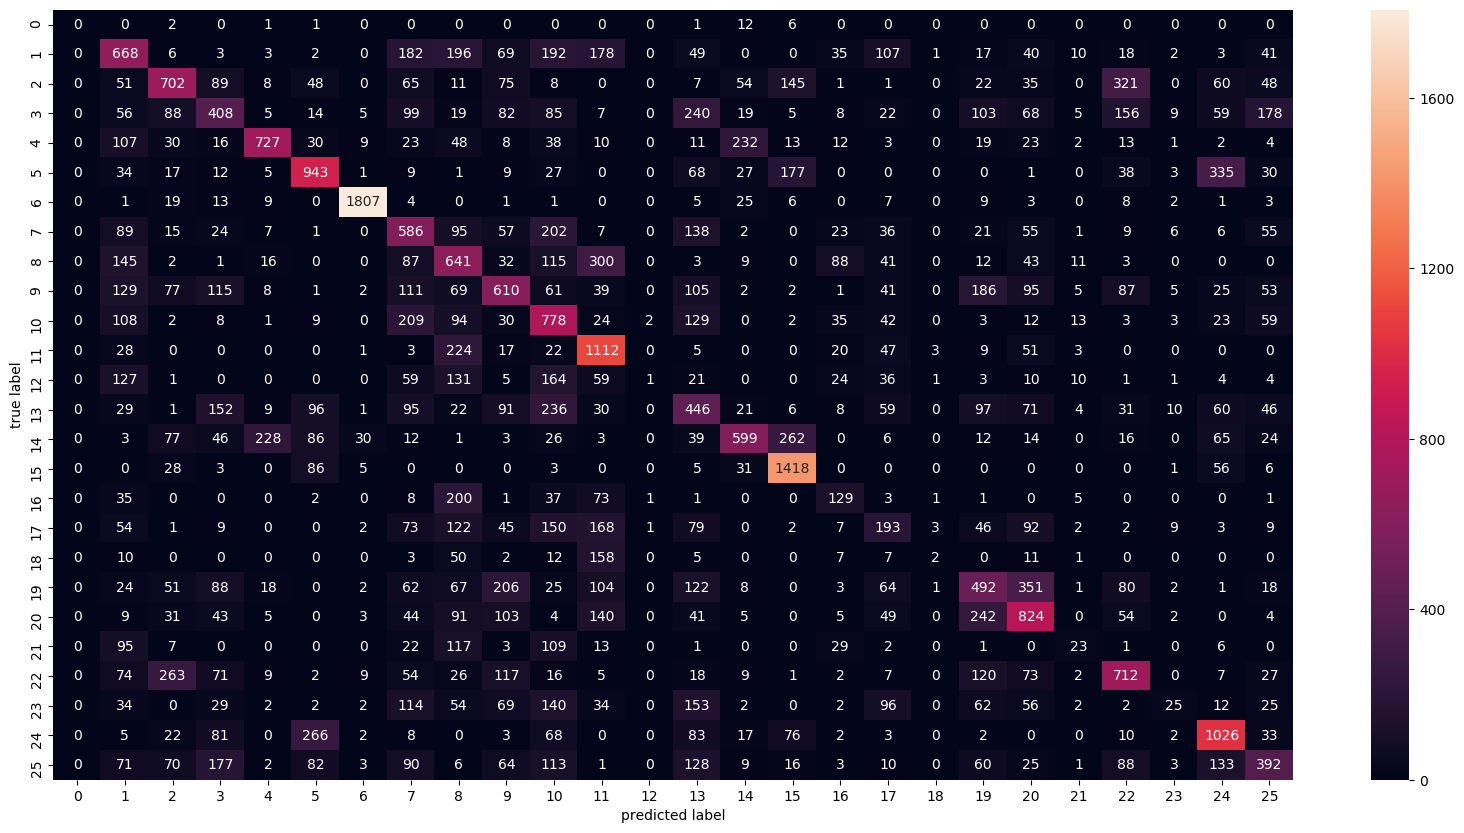

In [23]:
grid_predictions = clf.predict(X_test)

# print classification report 
print(classification_report(y_test, grid_predictions)) 

# compute the confusion matrix
plt.figure(figsize=(10,5))
cm = confusion_matrix(y_test, grid_predictions)

# plot the confusion matrixs
plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True, fmt='g')

plt.ylabel('true label')
plt.xlabel('predicted label')

## Voting

C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.30      0.42      0.35      1822
           2       0.44      0.38      0.41      1751
           3       0.27      0.27      0.27      1740
           4       0.63      0.55      0.58      1381
           5       0.52      0.56      0.54      1737
           6       0.95      0.94      0.95      1924
           7       0.25      0.39      0.30      1435
           8       0.27      0.50      0.35      1549
           9       0.35      0.28      0.31      1829
          10       0.28      0.52      0.37      1589
          11       0.47      0.65      0.55      1545
          12       0.45      0.01      0.01       662
          13       0.25      0.19      0.21      1621
          14       0.54      0.35      0.42      1552
          15       0.66      0.84      0.74      1642
          16       0.34      0.12      0.17       498
          17       0.23    

Text(0.5, 80.7222222222222, 'predicted label')

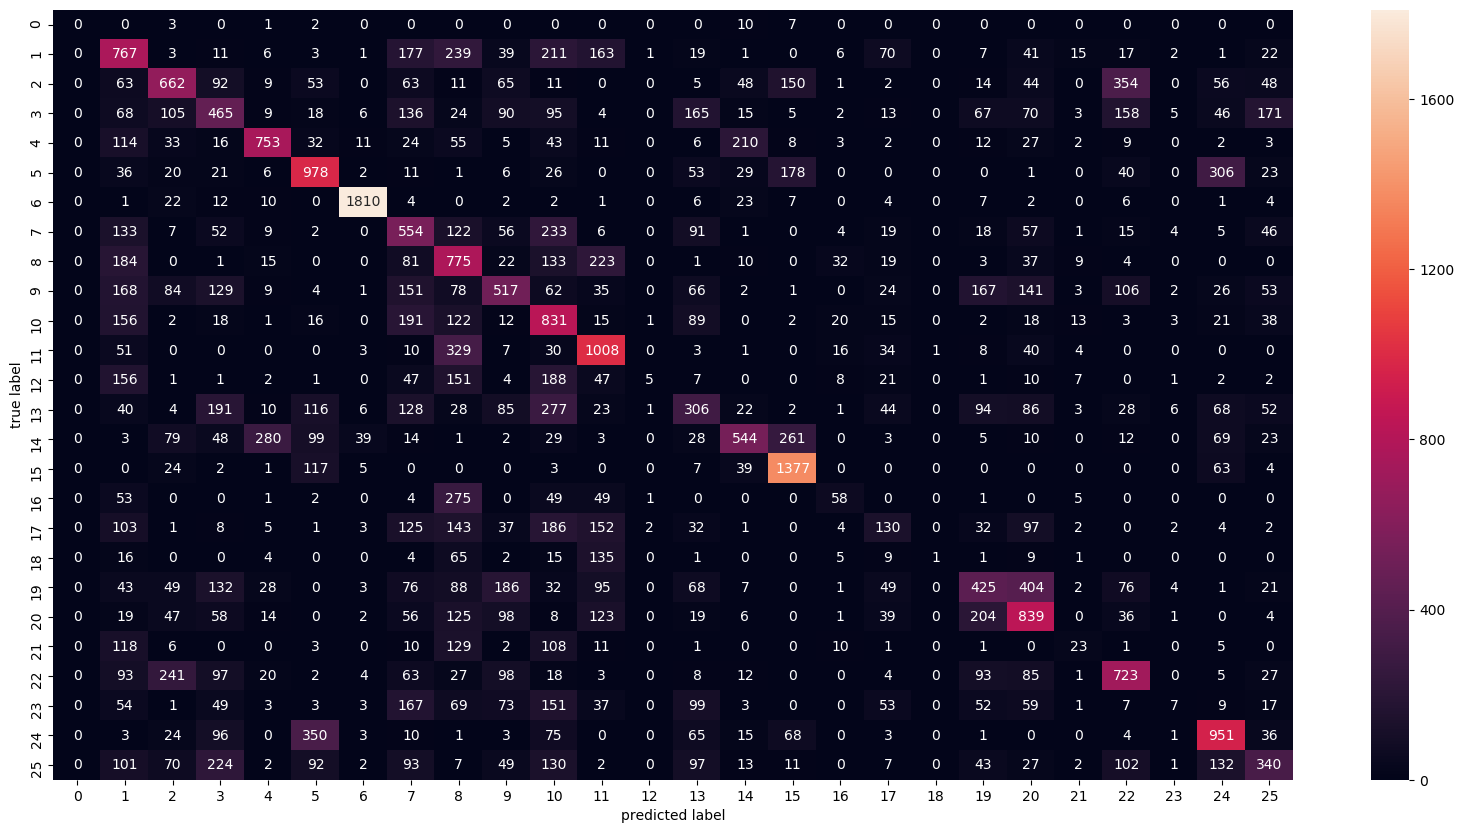

In [24]:
from sklearn.ensemble import VotingClassifier

nn = tuned_NN
gnb = GaussianNB()
knn = tuned_knn

classifiers = []
classifiers.append(('clf1', nn))
classifiers.append(('clf2', gnb))
classifiers.append(('clf3', knn))
ensemble = VotingClassifier(classifiers, voting='hard')
ensemble.fit(X_train, y_train)

y_pred_vot = ensemble.predict(X_test)

# voting matrix
print(classification_report(y_test, y_pred_vot))

cm = confusion_matrix(y_test, y_pred_vot)
# plot the confusion matrixs
plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True, fmt='g')

plt.ylabel('true label')
plt.xlabel('predicted label')

## Stacking

C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.30      0.40      0.35      1822
           2       0.47      0.38      0.42      1751
           3       0.27      0.24      0.26      1740
           4       0.66      0.54      0.59      1381
           5       0.51      0.58      0.54      1737
           6       0.95      0.94      0.95      1924
           7       0.26      0.32      0.29      1435
           8       0.28      0.44      0.34      1549
           9       0.32      0.29      0.30      1829
          10       0.28      0.49      0.35      1589
          11       0.46      0.67      0.54      1545
          12       0.17      0.02      0.04       662
          13       0.23      0.20      0.21      1621
          14       0.52      0.36      0.43      1552
          15       0.67      0.82      0.74      1642
          16       0.29      0.20      0.24       498
          17       0.20    

Text(0.5, 80.7222222222222, 'predicted label')

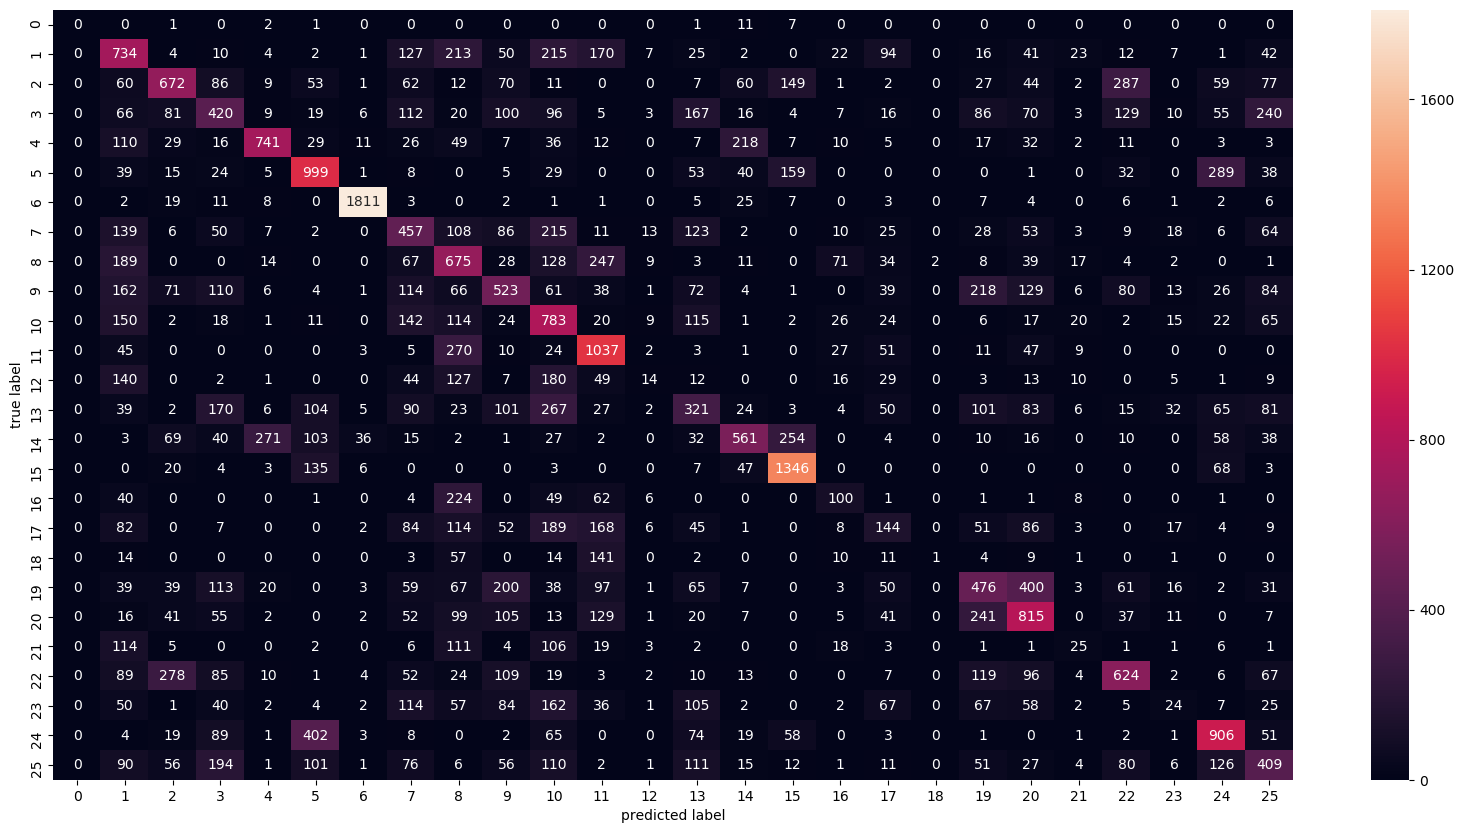

In [25]:
from mlxtend.classifier import StackingClassifier
from sklearn.svm import SVC
    
meta_clf = SVC(gamma='scale')
clf_stack = StackingClassifier(classifiers=[nn, gnb, knn], meta_classifier=meta_clf, store_train_meta_features=True)

clf_stack.fit(X_train, y_train)
y_pred_stack = clf_stack.predict(X_test)

print(classification_report(y_test, y_pred_stack))

cm = confusion_matrix(y_test, y_pred_stack)

# plot the confusion matrixs
plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True, fmt='g')

plt.ylabel('true label')
plt.xlabel('predicted label')


## Clustering with LDA Feature Extraction

In [35]:
X_num = X.select_dtypes(['int64','float64'])
minmax_scale = MinMaxScaler()
X_num = pd.DataFrame(minmax_scale.fit_transform(X_num),columns = X_num.columns)
le = LabelEncoder()
modes = le.fit_transform(X['mode'])
print(X_num.shape)
print(modes.shape)

(176774, 11)
(176774,)


In [36]:
X_num.sample(5)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
170123,0.23,0.039759,0.582663,0.167172,0.923922,0.005746,0.047489,0.830074,0.058848,0.440219,0.7270
89579,0.65,0.066365,0.566570,0.033567,0.737732,0.000000,0.081518,0.860056,0.178662,0.665685,0.0497
7172,0.39,0.418675,0.533312,0.049170,0.678672,0.016216,0.072228,0.813206,0.019369,0.506677,0.3720
31914,0.04,0.003936,0.391696,0.036161,0.939939,0.000000,0.243686,0.834398,0.101397,0.713505,0.6860
66428,0.08,0.025100,0.550477,0.019031,0.695690,0.000000,0.061727,0.811943,0.009526,0.538763,0.3350


In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit(X_num, modes).transform(X_num)
X_lda = pd.DataFrame(X_lda)
X_lda.sample(5)

,0
33049,-0.973170
74642,-2.378996
45679,-1.950291
123047,0.437739
95539,-0.041011


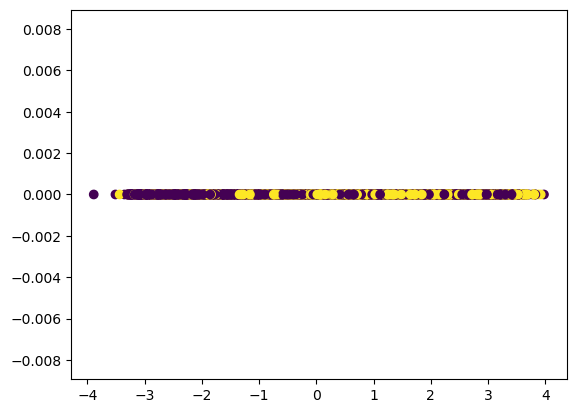

In [38]:
y_lda = np.zeros(len(X_lda))
plt.scatter(X_lda,y_lda,c=modes)

In [39]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_lda)
print(kmeans.cluster_centers_)

[[-0.92318954]
 [ 0.67047381]]


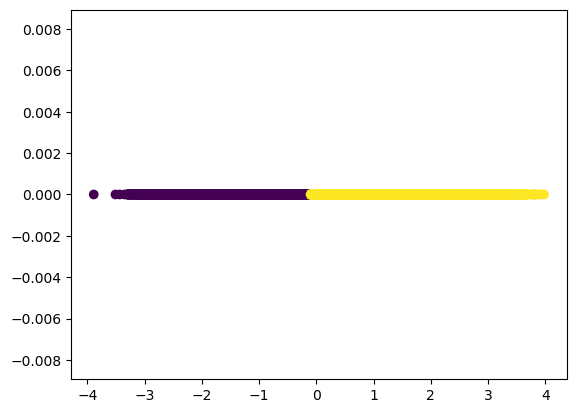

In [40]:
plt.scatter(X_lda,y_lda,c=kmeans.labels_)

              precision    recall  f1-score   support

           0       0.74      0.47      0.57    116619
           1       0.40      0.67      0.50     60155

    accuracy                           0.54    176774
   macro avg       0.57      0.57      0.54    176774
weighted avg       0.62      0.54      0.55    176774



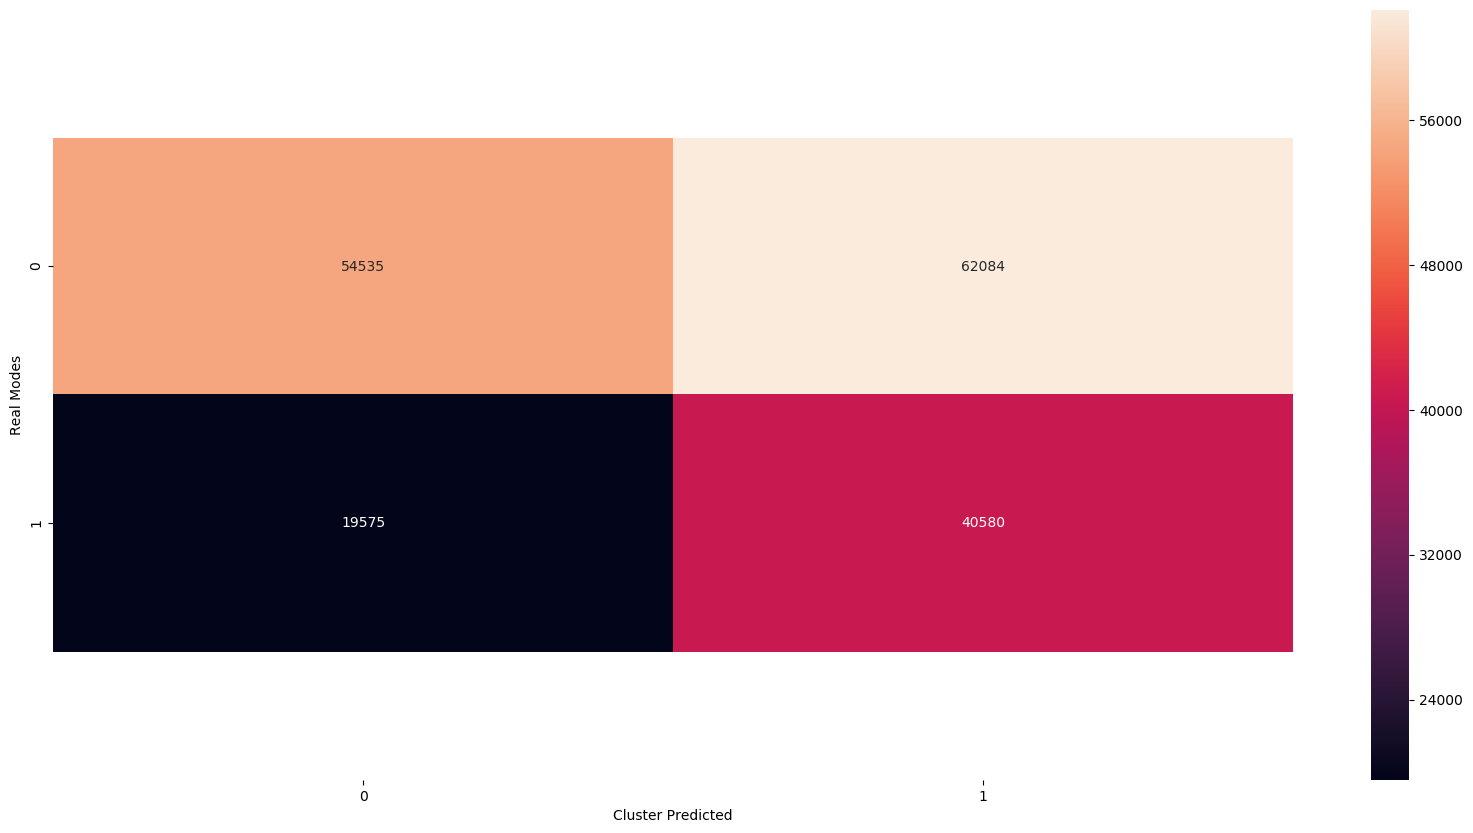

In [41]:
cluster_cm = confusion_matrix(modes,kmeans.labels_)
plt.figure(figsize=(20,10))
sns.heatmap(cluster_cm,annot=True,fmt='g')
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.xlabel('Cluster Predicted')
plt.ylabel('Real Modes')
cluster_report = classification_report(modes,kmeans.labels_)
print(cluster_report)